<a href="https://colab.research.google.com/github/Tunok24/introCNN/blob/main/introCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import time

In [2]:
# Convert MNIST Image Files to 4D tensors
transform = transforms.ToTensor()

# Train Data
train_data = datasets.MNIST(root='mnistData', train=True, download=True, transform = transform)
test_data = datasets.MNIST(root='mnistData', train=False, download=True, transform = transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 55671963.83it/s]


Extracting mnistData/MNIST/raw/train-images-idx3-ubyte.gz to mnistData/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1794602.87it/s]

Extracting mnistData/MNIST/raw/train-labels-idx1-ubyte.gz to mnistData/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 14783073.58it/s]


Extracting mnistData/MNIST/raw/t10k-images-idx3-ubyte.gz to mnistData/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 7977608.36it/s]

Extracting mnistData/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnistData/MNIST/raw



In [3]:
train_data
test_data

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [4]:
# Define CNN. Build Convolution layers.
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
conv3 = nn.Conv2d(16, 80, 3, 1)

In [5]:
# Grab one mnist image
for i, (X_train, y_train) in enumerate(train_data):
  break

# Convert to 4D tensor
x = X_train.view(1,1,28,28)

# Perform first convolution
x = F.relu(conv1(x))
x.shape

# Pooling layer
x = F.max_pool2d(x, 2, 2)
x.shape

# Perform second convolution
x = F.relu(conv2(x))
x.shape

# Perform third convolution
x = F.relu(conv3(x))
x.shape

# Perform second pooling
x = F.max_pool2d(x, 2, 2)
x.shape

torch.Size([1, 80, 4, 4])

In [6]:
# Define Model class for our NN
class CNNmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    self.conv3 = nn.Conv2d(16, 80, 3, 1)

    # Fully connected layers
    self.fc1 = nn.Linear(4*4*80, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  # Forward function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)
    X = F.relu(self.conv2(X))
    X = F.relu(self.conv3(X))
    X = F.max_pool2d(X, 2, 2)

    # Flatten
    X = X.view(-1, 4*4*80)

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)



In [7]:
# Create an instance
torch.manual_seed(41)
model = CNNmodel()
model

# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [11]:
# Time
start_time = time.time()

# Create variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Loop thru epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b += 1

    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr


    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print some results
    if b%600 == 0:
      print(f'Epoch: {i}, Batch: {b}, Loss: {loss.item()}')

  # Append losses
  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
elapsed_time = current_time - start_time
print(f'Training took {elapsed_time/60} minutes!')

Epoch: 0, Batch: 600, Loss: 0.04888717830181122
Epoch: 0, Batch: 1200, Loss: 0.43228888511657715
Epoch: 0, Batch: 1800, Loss: 0.0005490210605785251
Epoch: 0, Batch: 2400, Loss: 0.3083384931087494
Epoch: 0, Batch: 3000, Loss: 0.27115771174430847
Epoch: 0, Batch: 3600, Loss: 0.17159420251846313
Epoch: 0, Batch: 4200, Loss: 0.0009632888250052929
Epoch: 0, Batch: 4800, Loss: 0.0985824316740036
Epoch: 0, Batch: 5400, Loss: 0.07105783373117447
Epoch: 0, Batch: 6000, Loss: 0.5724804997444153
Epoch: 1, Batch: 600, Loss: 0.0008232739055529237
Epoch: 1, Batch: 1200, Loss: 0.00027172642876394093
Epoch: 1, Batch: 1800, Loss: 0.0009893913520500064
Epoch: 1, Batch: 2400, Loss: 0.45737800002098083
Epoch: 1, Batch: 3000, Loss: 0.000839118380099535
Epoch: 1, Batch: 3600, Loss: 0.07504609227180481
Epoch: 1, Batch: 4200, Loss: 0.002375237178057432
Epoch: 1, Batch: 4800, Loss: 0.002414323855191469
Epoch: 1, Batch: 5400, Loss: 0.06831320375204086
Epoch: 1, Batch: 6000, Loss: 0.0006870735669508576
Epoch: 2,

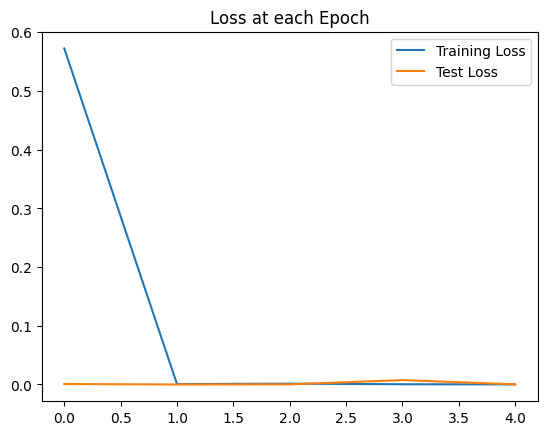

In [12]:
# Graph loss/corr at each epoch
# train_losses = [t.cpu().detach().numpy() for t in train_losses]
# train_correct = [t.cpu().detach().numpy() for t in train_correct] OR,
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title("Loss at each Epoch")
plt.legend()
plt.show()

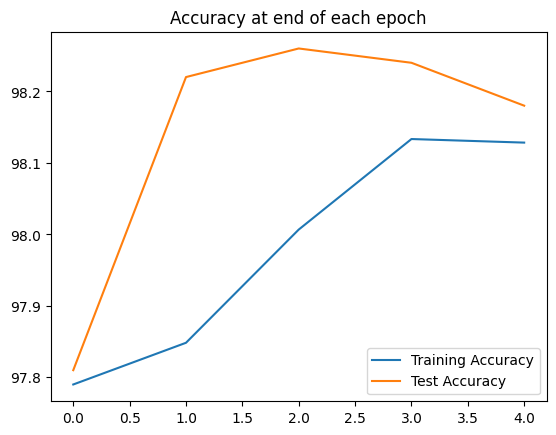

In [13]:
# Graph accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Test Accuracy')
plt.title("Accuracy at end of each epoch")
plt.legend()
plt.show()

In [19]:
# Get the percentage of correct
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
  correct = 0
  for X_test, y_test, in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

print(f'Test Accuracy: {(correct/len(y_test)) * 100} %')


Test Accuracy: 98.18000030517578 %


0

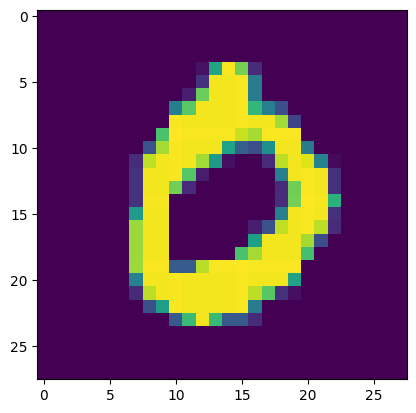

In [55]:
# Grab a test image
test_number = 3
test_data[test_number][0]
test_data[test_number][0].reshape(28, 28)
plt.imshow(test_data[test_number][0].reshape(28, 28))
test_data[test_number][1]

In [56]:
# Pass the image thru our model
torch.max(model(test_data[test_number][0].view(1,1,28,28)), 1)[1]

tensor([0])

In [57]:
# OR, Pass the image thru our model
model.eval()
with torch.no_grad():
  new_pred = model(test_data[test_number][0].view(1,1,28,28))

# Check new pred
print(f'The predicted number is: {new_pred.argmax().item()}')

The predicted number is: 0
